<a href="https://colab.research.google.com/github/sergiolopezzl/DIMD/blob/main/clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [44]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [46]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
train_df[["Embarked"]].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

In [48]:
survived = train_df[train_df['Survived']==1]
len(survived)

342

In [49]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
train_df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [51]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Sex', ylabel='Survived'>

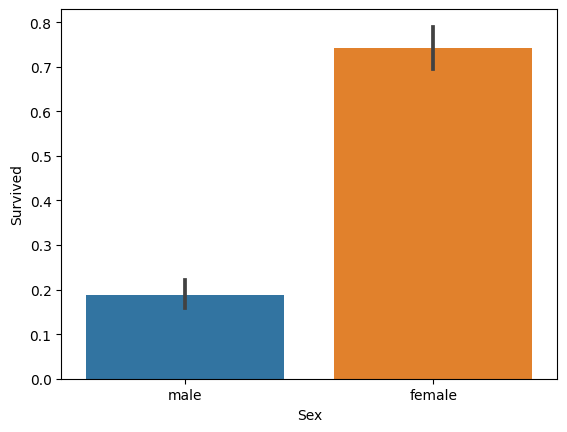

In [52]:
sns.barplot(x='Sex', y='Survived', data=train_df)

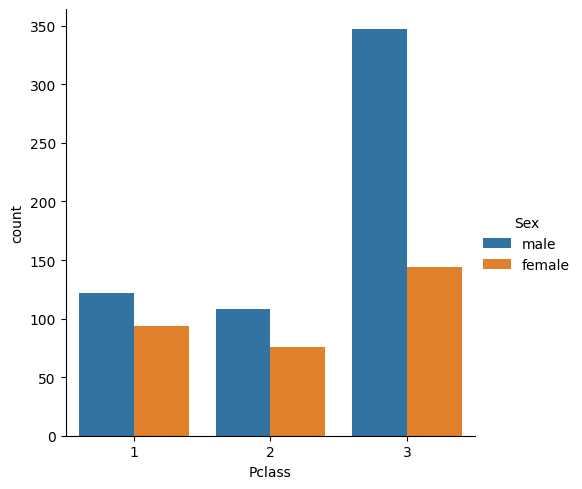

In [53]:
sns.catplot(x = 'Pclass', data=train_df, hue='Sex', kind='count')

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

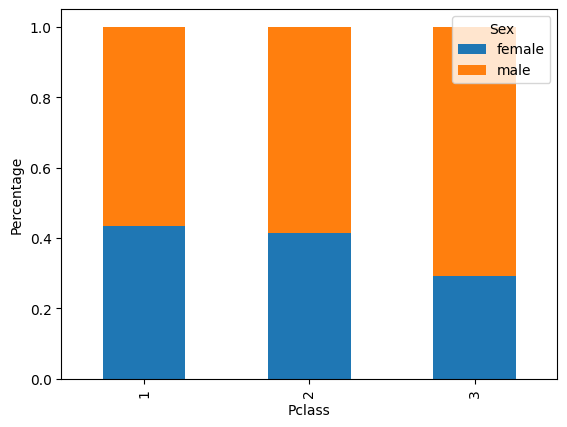

In [57]:
# Pclass & Sex vs. Survival
tab = pd.crosstab(train_df['Pclass'], train_df['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [59]:
bin = [0,15,100]
train_df["adult"] = pd.cut(train_df['Age'], bin, labels=["kid","Adult"])
pd.crosstab(train_df.Survived, train_df.adult, dropna=False, normalize=True, margins=True)

adult,kid,Adult,All
Survived,,,
0,0.047619,0.546218,0.616162
1,0.068627,0.337535,0.383838
All,0.116246,0.883754,1.000000


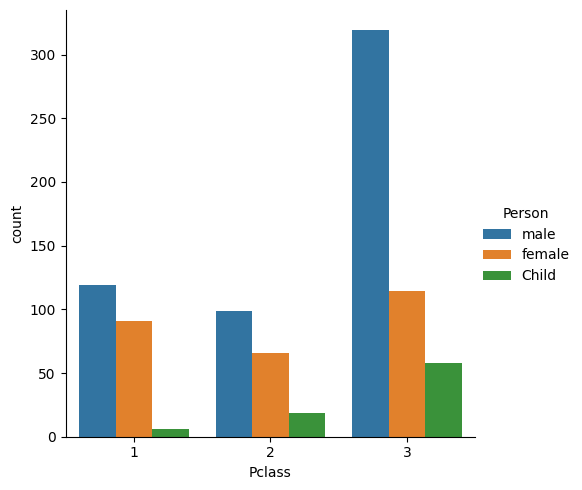

In [60]:
train_df['Person'] = train_df.Sex
train_df.loc[train_df['Age'] < 16, 'Person'] = 'Child'
sns.catplot(x='Pclass', data=train_df, hue='Person', kind='count')

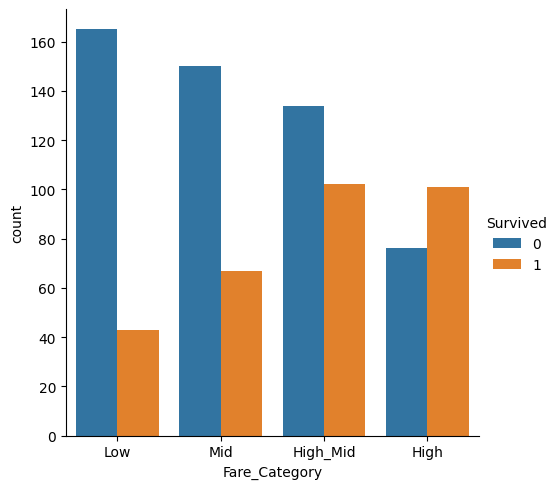

In [64]:
train_df['Fare_Category'] = pd.cut(train_df['Fare'], bins = [0, 7.9, 14.45, 31.28, 120], labels =['Low', 'Mid', 'High_Mid', 'High'])
sns.catplot(x='Fare_Category', data=train_df, hue='Survived', kind='count')

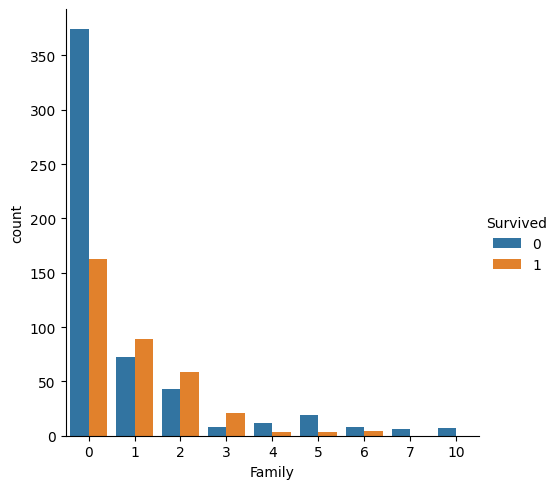

In [66]:
train_df['Family'] = train_df.Parch + train_df.SibSp
train_df['Is_Alone'] = train_df.Family == 0
sns.catplot(x='Family', data=train_df, hue='Survived', kind='count')

<Axes: >

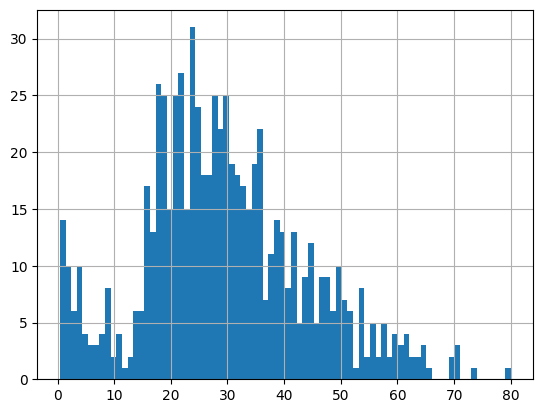

In [67]:
train_df.Age.hist(bins=80)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


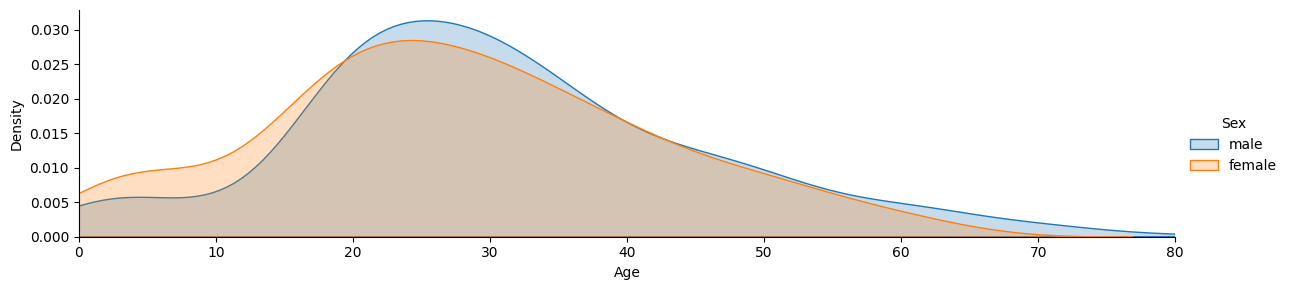

In [71]:
#Another way #kaggle y para datos grandes Hugging Face
fig = sns.FacetGrid(train_df, hue ="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = train_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [72]:
deck = train_df['Cabin'].dropna()
deck[0:5]

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

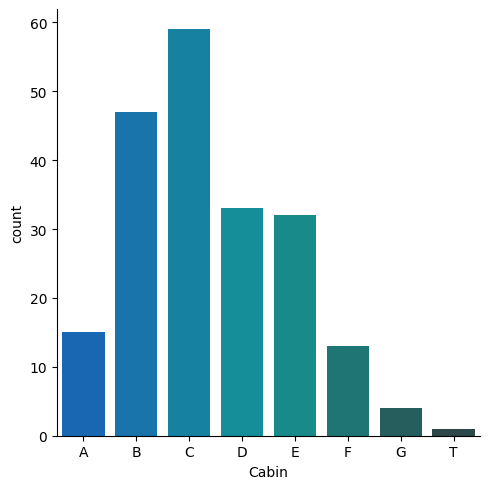

In [75]:
levels = []
for level in deck:
  levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')


In [76]:
train_df['Name'][10:20]

10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
Name: Name, dtype: object

In [77]:
!pip install nameparser

In [78]:
from nameparser import HumanName

In [79]:
train_df["Title"] = train_df["Name"].apply(lambda x: HumanName(x).title)
train_df["Title"].value_counts()

Mr.                 517
Miss.               182
Mrs.                125
Master.              40
Dr.                   7
Rev.                  6
                      4
Mlle.                 2
Col.                  2
Mme.                  1
Ms.                   1
Lady.                 1
Sir.                  1
Capt.                 1
the Countess. of      1
Name: Title, dtype: int64

In [80]:
train_df[['Title', 'Survived']].groupby(['Title'])

<Axes: >

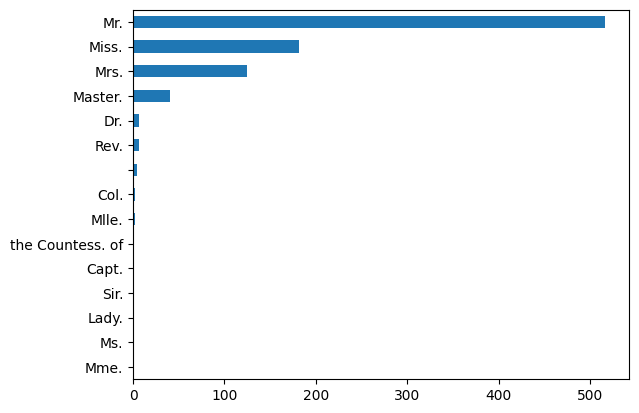

In [84]:
train_df["Title"].value_counts().sort_values().plot(kind = 'barh')

<Axes: xlabel='Sex', ylabel='Age'>

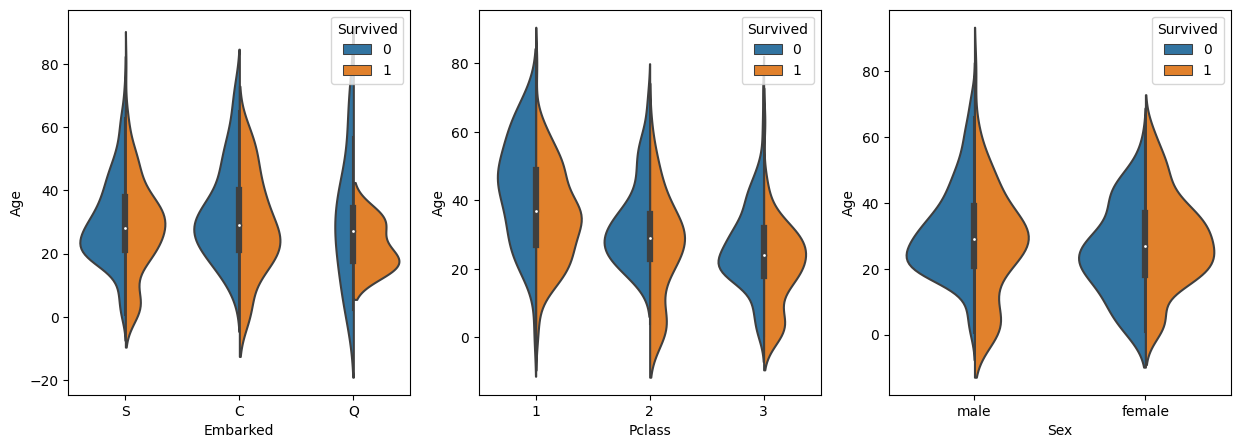

In [89]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax =ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax =ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax =ax3)

<ipython-input-91-37f693cec7f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.drop('PassengerId', axis=1).corr(), vmax=0.6, square=True,annot=True)


<Axes: >

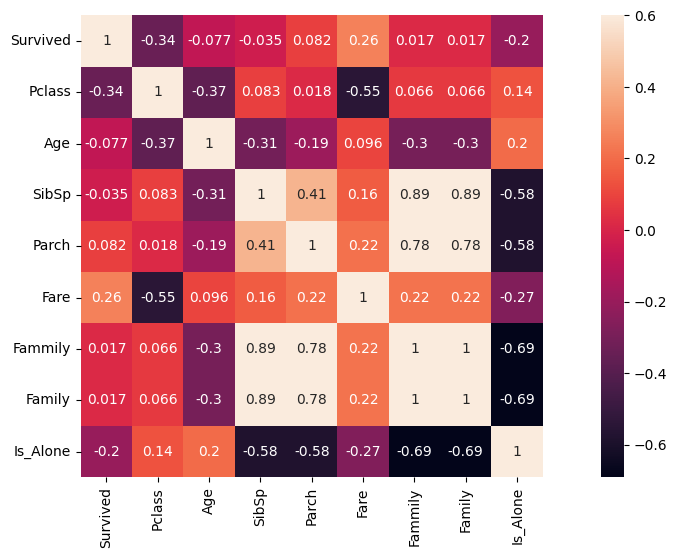

In [91]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.drop('PassengerId', axis=1).corr(), vmax=0.6, square=True,annot=True)

In [92]:
test_df = pd.read_csv('test.csv')
train_test_data = [train_df, test_df]
for dataset in train_test_data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [93]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult,Person,Fare_Category,Fammily,Family,Is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,male,Low,1,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,female,High,1,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,female,Mid,0,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,female,High,1,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,male,Mid,0,0,True,Mr
